# Python Functions

### Python 中要建立自己函式時，有兩種方式：
### - 如果簡單的函式，或許可以用「function handle」的方式建立
### - 如果複雜的函式，就用 def 的方式建立

In [1]:
add_fun = lambda a, b: a+b
add_fun(1,2)

3

In [2]:
def add_fun(a,b): 
    c=a+b
    return c 
add_fun(1,2)

3

In [3]:
def add_fun(a,b): 
    return a+b
add_fun(1,2)

3

### 以下為利用 Black-Scholes Formula 來計算選擇權理論價格的例子

In [4]:
import numpy
from scipy.stats import norm
from pandas import DataFrame 

In [5]:
def Black_Scholes(spot, strike, maturity, vol, r_f):
    d1 = (numpy.log(spot/strike)+(r_f-vol**2/2))/(vol*numpy.sqrt(maturity))
    d2 = d1 - vol*numpy.sqrt(maturity)
    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)
    BS_price = spot*N_d1 - strike*numpy.exp(-r_f*maturity)*N_d2
    
    return BS_price

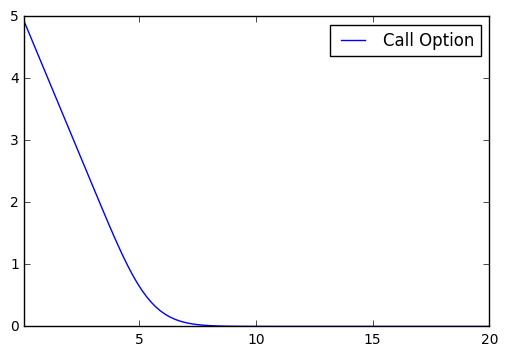

In [6]:
r_f = 0.1
maturity = 1
spot = 5
vol = 0.2
strike = numpy.linspace(0.1,20,100)
bs_price = [Black_Scholes(spot, strike[i], maturity, vol, r_f) for i in range(len(strike))]
option = DataFrame([bs_price], columns=strike, index=["Call Option"]).T

% matplotlib inline
option.plot()

### 在自定義函式中，也可以設定參數的預設值，但是在有設定預設值的參數後，不能再擺入未設定預設值的參數。

In [7]:
def BS_formula( c_p="c", spot, strike, maturity, vol, r_f):
    d1 = (numpy.log(spot/strike)+(r_f-vol**2/2))/(vol*numpy.sqrt(maturity))
    d2 = d1 - vol*numpy.sqrt(maturity)
    if c_p == "c":
        N_d1 = norm.cdf(d1)
        N_d2 = norm.cdf(d2)
        BS_price = spot*N_d1 - strike*numpy.exp(-r_f*maturity)*N_d2
    elif c_p == "p":
        N_d1 = norm.cdf(-d1)
        N_d2 = norm.cdf(-d2)
        BS_price = strike*numpy.exp(-r_f*maturity)*N_d2 - spot*N_d1
    else:
        BS_price = numpy.nan
        print("Error: Please set c_p as c or p!")
        
    return BS_price

SyntaxError: non-default argument follows default argument (<ipython-input-7-1879417b7003>, line 1)

In [8]:
def BS_formula(spot, strike, maturity, vol, r_f, c_p="c"):
    d1 = (numpy.log(spot/strike)+(r_f-vol**2/2))/(vol*numpy.sqrt(maturity))
    d2 = d1 - vol*numpy.sqrt(maturity)
    if c_p == "c":
        N_d1 = norm.cdf(d1)
        N_d2 = norm.cdf(d2)
        BS_price = spot*N_d1 - strike*numpy.exp(-r_f*maturity)*N_d2
    elif c_p == "p":
        N_d1 = norm.cdf(-d1)
        N_d2 = norm.cdf(-d2)
        BS_price = strike*numpy.exp(-r_f*maturity)*N_d2 - spot*N_d1
    else:
        BS_price = numpy.nan
        print("Error: Please set c_p as c or p!")
        
    return BS_price

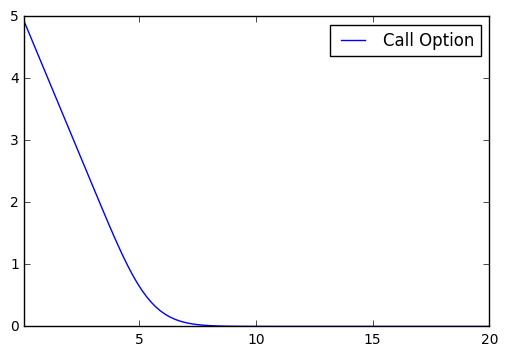

In [9]:
r_f = 0.1
maturity = 1
spot = 5
vol = 0.2
strike = numpy.linspace(0.1,20,100)
bs_price = [BS_formula(spot, strike[i], maturity, vol, r_f, c_p="c") for i in range(len(strike))]
option = DataFrame([bs_price], columns=strike, index=["Call Option"]).T

% matplotlib inline
option.plot()

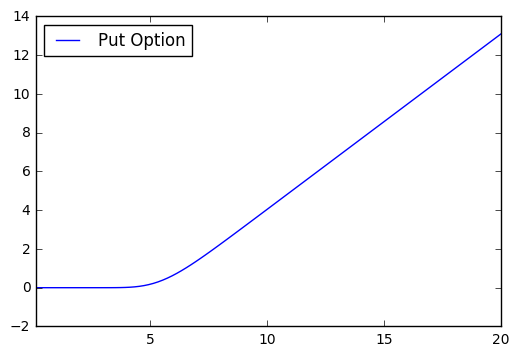

In [10]:
r_f = 0.1
maturity = 1
spot = 5
vol = 0.2
strike = numpy.linspace(0.1,20,100)
bs_price = [BS_formula(spot, strike[i], maturity, vol, r_f, c_p="p") for i in range(len(strike))]
option = DataFrame([bs_price], columns=strike, index=["Put Option"]).T

% matplotlib inline
option.plot()